# 1) Loading Packages and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import datetime
from statistics import mean
import collections

from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error


# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



# Pandas, and NumPy: 

from time import time


import datetime
import collections

import scipy.stats


In [6]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


# Reading the data

In [54]:

# read in all our data
data = pd.read_csv("Bondora_raw.csv")



# 4) Data Structure and Content

In [55]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [57]:
data.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [58]:
data.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,...,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,...,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,...,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.206790e+05,155.000000,0.000000,96.000000,10.000000,2.000000,1.000000,1.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,9.235970e+05,465.000000,0.000000,317.000000,13.000000,4.000000,4.000000,3.000000,40.000000,0.000000,...,0.000000,1.000000,396.354100,197.980000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
75%,1.311025e+06,1218.000000,5.000000,729.000000,17.000000,5.000000,4.000000,4.000000,50.000000,1.000000,...,202.900000,2.000000,4250.000000,780.950000,0.000000,0.000000,7.000000,60.000000,0.000000,17.330000
max,1.855339e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,2.000000,...,64494.770000,25.000000,53762.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5295.290000


In [59]:
data['AmountOfPreviousLoansBeforeLoan'].value_counts()

0.00        66647
530.00       2897
2125.00      2542
4250.00      2311
1060.00      1913
            ...  
23832.00        1
1974.00         1
14835.00        1
16925.00        1
1266.94         1
Name: AmountOfPreviousLoansBeforeLoan, Length: 12005, dtype: int64

In [60]:
data['Age'].value_counts()


34    4083
29    3985
37    3959
31    3959
35    3958
      ... 
77       3
1        2
71       2
76       1
74       1
Name: Age, Length: 62, dtype: int64

In [61]:
data['Age'].mean()

40.819295467891685

In [62]:
data['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

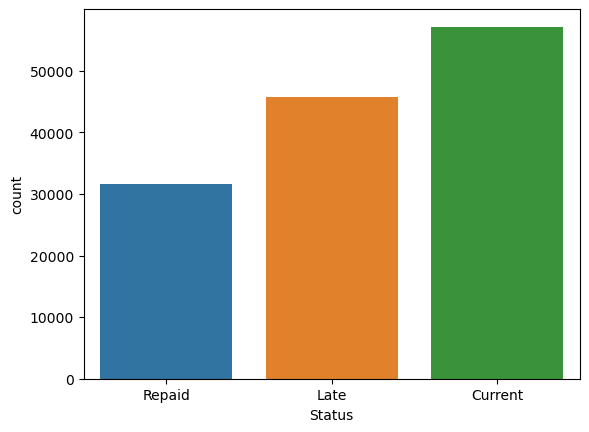

In [63]:
sns.countplot(data.Status)

In [64]:
data['Country'].value_counts()

EE    77335
FI    32650
ES    24248
SK      296
Name: Country, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='count'>

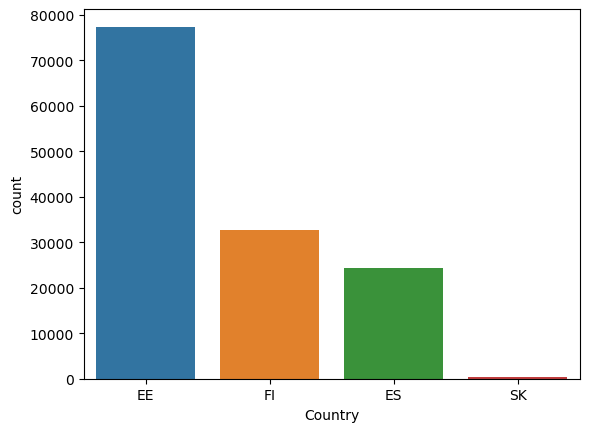

In [65]:
sns.countplot(data.Country)

In [66]:
data['City'].value_counts()

Tallinn                       15604
TALLINN                        6146
Tartu linn                     3326
HELSINKI                       3294
Pärnu linn                     1986
                              ...  
KOSE VALD, ARDU                   1
KALAMAJA                          1
LLERENA                           1
SALME VALD, TEHUMARDI KÜLA        1
VEĽKÉ DRŽKOVCE                    1
Name: City, Length: 7733, dtype: int64

# 5) Exploratory Data Analysis
Find the normality, and consistency of the data

In [67]:
data['Education'].value_counts()

 4.0    51330
 5.0    35398
 3.0    29260
 1.0    12057
 2.0     6427
 0.0        8
-1.0        4
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

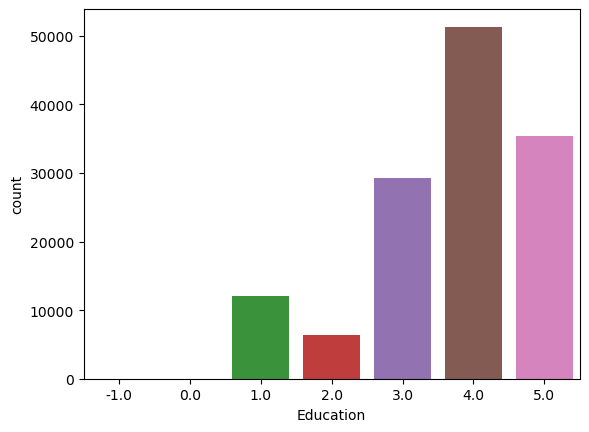

In [68]:
sns.countplot(data.Education)

# Data cleaning

In [69]:
modifed_data = data.copy()
#modifedData = data.copy()



In [18]:
modifed_data

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1040.06,180+
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,...,0,2017-06-27,2018-06-20,NaN,NaN,NaN,NaN,0.0,0.00,NaN
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,...,0,NaN,NaN,NaN,0.0,60.0,NaN,0.0,1051.85,8-15
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,...,0,2016-04-01,2016-10-03,NaN,NaN,NaN,NaN,0.0,889.50,31-60


In [70]:

drop_cols=['BidsApi', 'BidsPortfolioManager', 'BidsPortfolioManager', 'BidsManual',
           'CurrentDebtDaysPrimary', 'CurrentDebtDaysPrimary', 'PrincipalOverdueBySchedule', 
           'PrincipalOverdueBySchedule', 'PrincipalOverdueBySchedule', 'IncomeFromPrincipalEmployer',
           'IncomeFromPension', 'EAD1', 'EAD2', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
           'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'ReportAsOfEOD', 'LoanId','LoanNumber',
           'ListedOnUTC','DateOfBirth','BiddingStartedOn','UserName','LoanApplicationStartedDate','FirstPaymentDate',
           'LoanApplicationStartedDate','ApplicationSignedHour', 'ApplicationSignedWeekday',
           'ActiveScheduleFirstPaymentReached','ModelVersion','WorseLateCategory','PlannedPrincipalTillDate',
         'ProbabilityOfDefault', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'GracePeriodStart', 'GracePeriodEnd',
           'NextPaymentDate', 'NextPaymentNr', 'PreviousEarlyRepaymentsBefoleLoan', 'PreviousRepaymentsBeforeLoan',
           "NrOfScheduledPayments","ReScheduledOn","PrincipalDebtServicingCost","InterestAndPenaltyDebtServicingCost",
           "ActiveLateLastPaymentCategory", 'PlannedInterestTillDate', 'CurrentDebtDaysSecondary',
           'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'PrincipalRecovery',
           'InterestRecovery', 'RecoveryStage', 'EL_V0', 'EL_V0', 'NrOfDependants', 'Rating_V0', 'CreditScoreEsEquifaxRisk', 
          'CreditScoreFiAsiakasTietoRiskGrade', 'GracePeriodStart','GracePeriodEnd', 'CreditScoreEeMini', 'PrincipalPaymentsMade',
           'MonthlyPaymentDay','LastPaymentOn', 'DebtOccuredOn', 'DebtOccuredOnForSecondary', 'DefaultDate', 'StageActiveSince', 'EL_V1', 
           'Rating_V1', 'Rating_V2', 'ActiveLateCategory','CreditScoreEsMicroL', 'NewCreditCustomer','LoanDate',
           'NewCreditCustomer','LoanDate','ContractEndDate','MaturityDate_Original','MaturityDate_Last', 'ContractEndDate', 'MaturityDate_Original', 'MaturityDate_Last'
                                  , 'Restructured', 'InterestAndPenaltyPaymentsMade', 
                                  'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 
                                  'PrincipalBalance', 'InterestAndPenaltyBalance',  
                                  'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 
                                  'PreviousEarlyRepaymentsCountBeforeLoan', 'VerificationType', 'LanguageCode',
                                   'LoanDuration', 'OccupationArea', 'ExistingLiabilities', 'LiabilitiesTotal',
                                   'RefinanceLiabilities', 'EmploymentDurationCurrentEmployer', 'County', 'City', 'Country', 'AppliedAmount', 'Rating', 'EmploymentPosition', 'FreeCash']
print(len(drop_cols))
modifed_data.drop(drop_cols,axis=1,inplace=True)





111


In [71]:
print(modifed_data.isnull().sum())

# drop rows with null values
modifed_data.dropna(inplace=True)

Age                      0
Gender                  45
Amount                   0
Interest                 0
MonthlyPayment        6685
UseOfLoan                0
Education               45
MaritalStatus           45
EmploymentStatus       197
WorkExperience       98007
HomeOwnershipType     1652
IncomeTotal              0
DebtToIncome            45
Status                   0
dtype: int64


In [72]:
print(modifed_data.duplicated().sum())

# drop duplicated rows
modifed_data.drop_duplicates(inplace=True)

7


In [73]:
modifed_data

,Age,Gender,Amount,Interest,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,WorkExperience,HomeOwnershipType,IncomeTotal,DebtToIncome,Status
14,20,0.0,319.56,40.00,0.00,3,3.0,3.0,3.0,2To5Years,0.0,26500.0,0.00,Late
40,49,1.0,319.56,30.00,0.00,7,2.0,4.0,3.0,MoreThan25Years,0.0,6200.0,0.00,Late
51,19,0.0,70.30,49.00,0.00,8,2.0,2.0,3.0,2To5Years,0.0,12000.0,0.00,Late
74,18,0.0,6.39,49.00,0.00,7,2.0,2.0,3.0,2To5Years,0.0,11175.0,0.00,Late
93,41,0.0,191.75,30.00,0.00,2,5.0,1.0,3.0,15To25Years,0.0,22000.0,0.00,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,37,0.0,3000.00,31.01,107.68,0,3.0,3.0,3.0,15To25Years,5.0,1400.0,7.69,Repaid
134525,35,0.0,3000.00,18.25,85.33,2,3.0,3.0,3.0,15To25Years,1.0,2265.0,31.58,Repaid
134526,40,0.0,2500.00,24.83,80.42,0,3.0,1.0,5.0,5To10Years,1.0,2500.0,3.22,Late
134527,47,1.0,3000.00,17.74,84.51,7,5.0,1.0,3.0,MoreThan25Years,4.0,540.0,44.35,Repaid


# Encode the numerical data to nominal data

In [23]:
modifed_data['Education'] = modifed_data['Education'].replace({1: 'Primary education', 2: 'Basic education', 3: 'Vocational education', 4: 'Secondary education', 5: 'Higher education'})


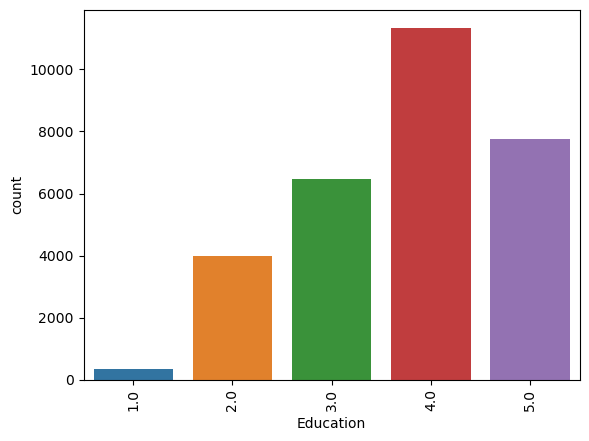

In [74]:
sns.countplot(x='Education', data=modifed_data)
plt.xticks(rotation=90)
plt.show()

In [75]:
modifed_data = modifed_data[(modifed_data['Education'] != -1) & (modifed_data['Education'] != 0)]


# Since we have two values that are not within the 5 categories, we will delete them

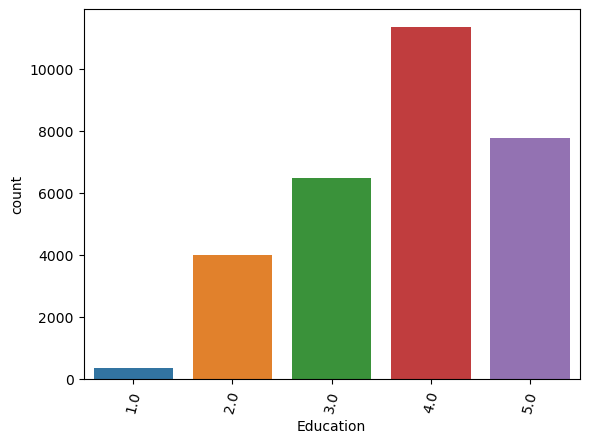

In [76]:
sns.countplot(x='Education', data=modifed_data)
plt.xticks(rotation=75)
plt.show()

<AxesSubplot:xlabel='HomeOwnershipType', ylabel='count'>

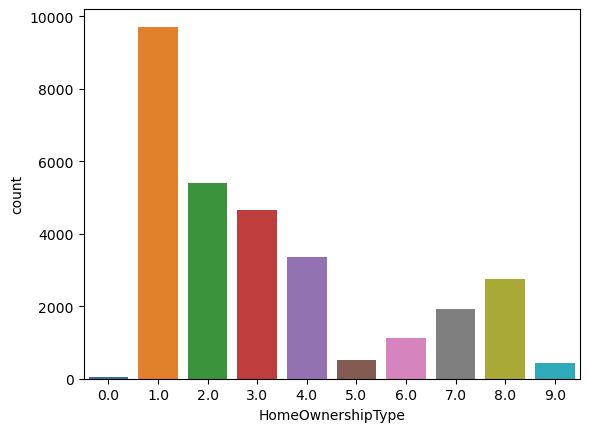

In [77]:
sns.countplot(modifed_data.HomeOwnershipType)

In [28]:
modifed_data['HomeOwnershipType'] = modifed_data['HomeOwnershipType'].replace({0: 'Homeless', 1: 'Owner',
                                                                               2: 'Living with parents', 3: 'Tenant, pre-furnished property',
                                                                               4: 'Tenant, unfurnished property', 5: 'Council house',
                                                                               6: 'Joint tenant',7: 'Joint ownership',
                                                                               8: 'Mortgage', 9: 'Owner with encumbrance', 10: 'Other' })


In [78]:
modifed_data = modifed_data[modifed_data['HomeOwnershipType'] != -1]


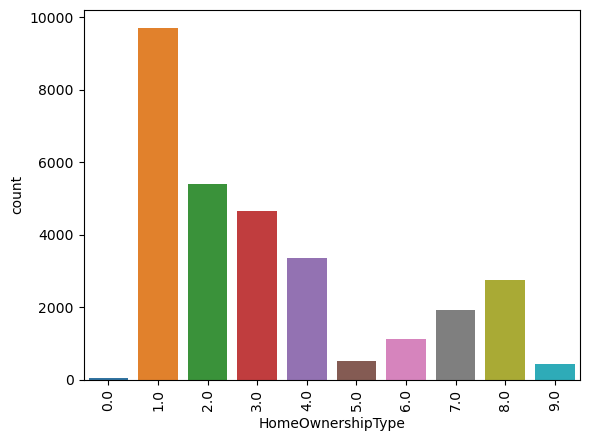

In [79]:
sns.countplot(x='HomeOwnershipType', data=modifed_data)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

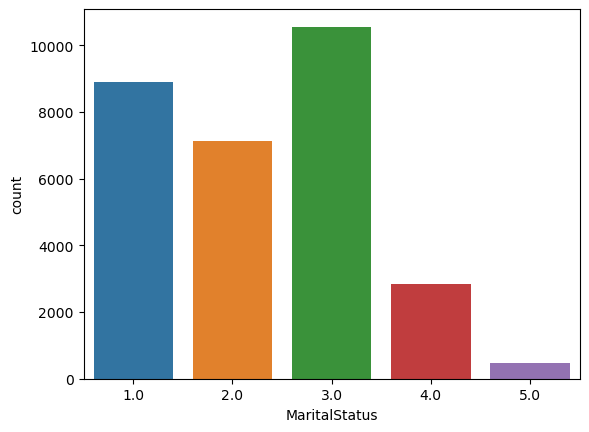

In [80]:
sns.countplot(modifed_data.MaritalStatus)

In [31]:
modifed_data['MaritalStatus'] = modifed_data['MaritalStatus'].replace({ 1: 'Married',
                                                                               2: 'Cohabitant',  3: 'Single',
                                                                               4: 'Divorced', 5: 'Widow'})


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

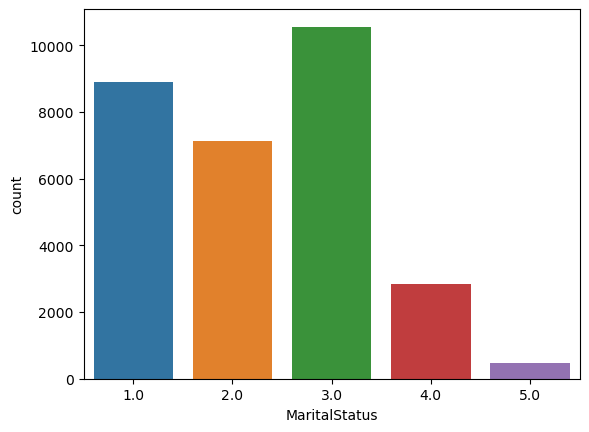

In [81]:
sns.countplot(modifed_data.MaritalStatus)

# We have encoding error; 0 and -1, will both be deleted

In [82]:


modifed_data = modifed_data[(modifed_data['MaritalStatus'] != -1) & (modifed_data['MaritalStatus'] != 0)]



<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

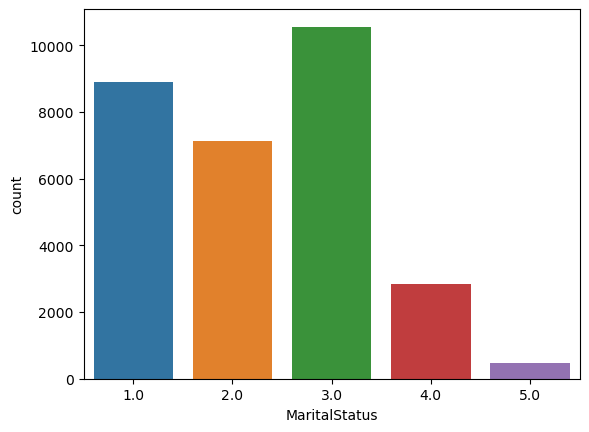

In [83]:
sns.countplot(modifed_data.MaritalStatus)

<AxesSubplot:xlabel='Gender', ylabel='count'>

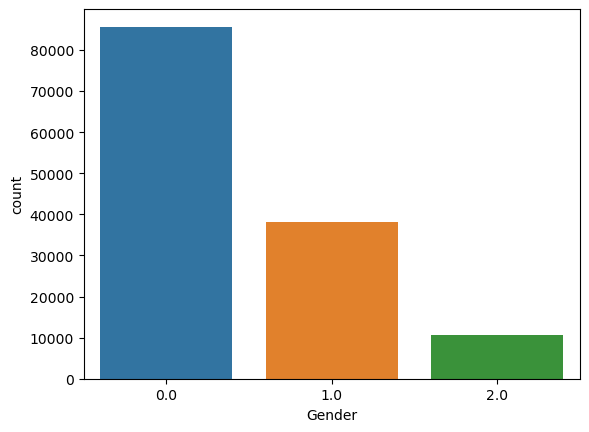

In [34]:
sns.countplot(data.Gender)

# Encoding

In [36]:
modifed_data['Gender'] = modifed_data['Gender'].replace({ 0.0: 'Male', 1.0: 'Woman',  2.0: 'Undefined'})


# delete undifined data

In [84]:
modifed_data.drop(modifed_data[modifed_data['Gender'] == 2.0].index, inplace=True)


<AxesSubplot:xlabel='Gender', ylabel='count'>

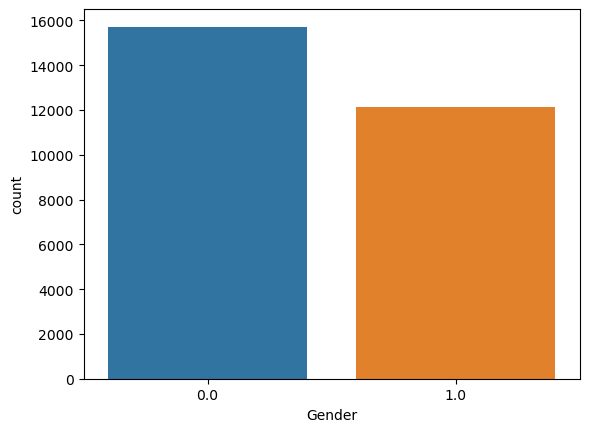

In [85]:
sns.countplot(modifed_data.Gender)

In [39]:
print(modifed_data.columns)


Index(['Age', 'Gender', 'Amount', 'Interest', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus', 'WorkExperience',
       'HomeOwnershipType', 'IncomeTotal', 'DebtToIncome', 'Status'],
      dtype='object')


In [37]:
modifed_data

,Age,Gender,Amount,Interest,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,WorkExperience,HomeOwnershipType,IncomeTotal,DebtToIncome,Status
14,20,0.0,319.56,40.00,0.00,3,Vocational education,3.0,3.0,2To5Years,Homeless,26500.0,0.00,Late
40,49,1.0,319.56,30.00,0.00,7,Basic education,4.0,3.0,MoreThan25Years,Homeless,6200.0,0.00,Late
51,19,0.0,70.30,49.00,0.00,8,Basic education,2.0,3.0,2To5Years,Homeless,12000.0,0.00,Late
74,18,0.0,6.39,49.00,0.00,7,Basic education,2.0,3.0,2To5Years,Homeless,11175.0,0.00,Late
93,41,0.0,191.75,30.00,0.00,2,Higher education,1.0,3.0,15To25Years,Homeless,22000.0,0.00,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,37,0.0,3000.00,31.01,107.68,0,Vocational education,3.0,3.0,15To25Years,Council house,1400.0,7.69,Repaid
134525,35,0.0,3000.00,18.25,85.33,2,Vocational education,3.0,3.0,15To25Years,Owner,2265.0,31.58,Repaid
134526,40,0.0,2500.00,24.83,80.42,0,Vocational education,1.0,5.0,5To10Years,Owner,2500.0,3.22,Late
134527,47,1.0,3000.00,17.74,84.51,7,Higher education,1.0,3.0,MoreThan25Years,"Tenant, unfurnished property",540.0,44.35,Repaid


In [86]:
modifed_data.WorkExperience.unique()

array(['2To5Years', 'MoreThan25Years', '15To25Years', 'LessThan2Years',
       '5To10Years', '10To15Years'], dtype=object)

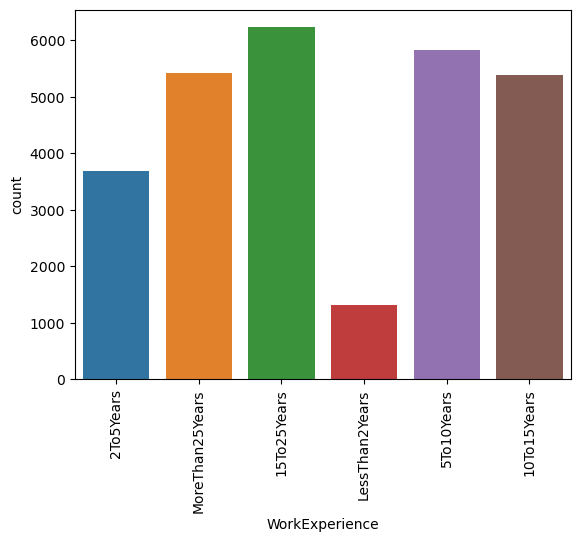

In [39]:
sns.countplot(modifed_data.WorkExperience)
plt.xticks(rotation=90)
plt.show()

In [40]:
null_values = modifed_data['WorkExperience'].isnull().sum()
print(f"There are {null_values} null values in the WorkExperience column.")


There are 0 null values in the WorkExperience column.


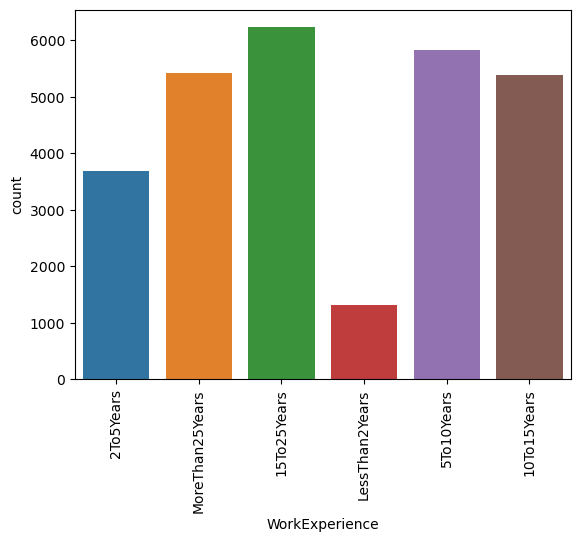

In [87]:
# Plot the countplot
sns.countplot(modifed_data.WorkExperience)
plt.xticks(rotation=90)
plt.show()

In [42]:


# Define the mapping dictionary
mapping_dict = {0.0: 'LessThan2Years', 1.0: '2To5Years', 2.0: '5To10Years', 3.0: '15To25Years', 4.0: 'MoreThan25Years'}

# Use map to apply the mapping dictionary to the 'WorkExperience' column
modifed_data['WorkExperience'] = modifed_data['WorkExperience'].map(mapping_dict)



In [97]:
encoder = preprocessing.LabelEncoder()


modifed_data['WorkExperience'] = encoder.fit_transform(modifed_data['WorkExperience'] )


In [100]:
modifed_data['Status'] = encoder.fit_transform(modifed_data['Status'] )


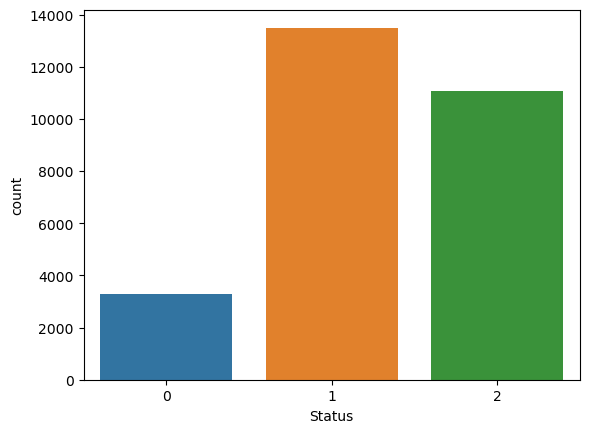

In [101]:
# Plot the countplot
sns.countplot(modifed_data.Status)

plt.show()

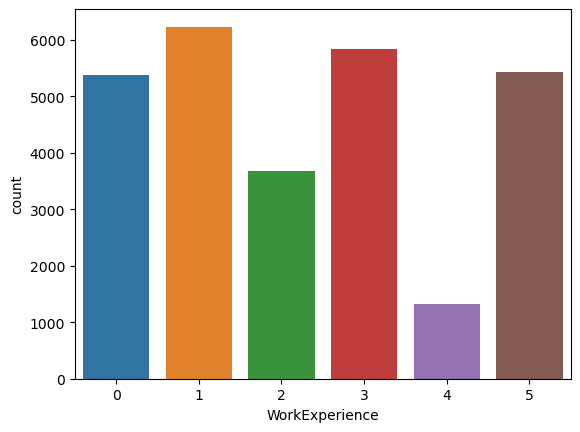

In [94]:
# Plot the countplot
sns.countplot(modifed_data.WorkExperience)

plt.show()

# UseOfLoan

it was 111, and 1xx encoding will all be summed into bigger category 

In [44]:
modifed_data['UseOfLoan']

14        3
40        7
51        8
74        7
93        2
         ..
134524    0
134525    2
134526    0
134527    7
134528    0
Name: UseOfLoan, Length: 27858, dtype: int64

<AxesSubplot:xlabel='UseOfLoan', ylabel='count'>

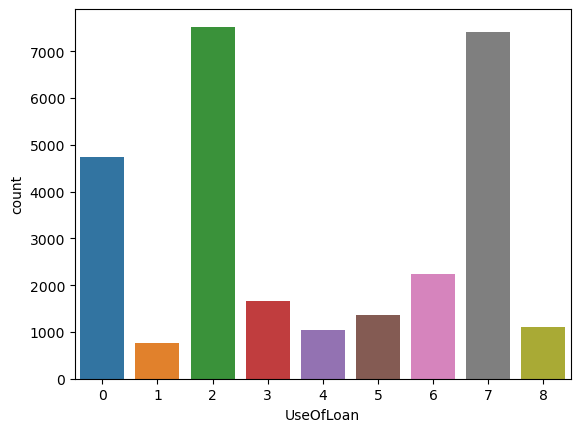

In [45]:
sns.countplot(modifed_data.UseOfLoan)

In [46]:
# Define loan categories
loan_consolidation = [0]
personal = [2, 4, 5, 6, 8]
business = [1, 3, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

# Replace loan categories in 'UseOfLoan' column
modifed_data['UseOfLoan'] = modifed_data['UseOfLoan'].replace({i: 'Loan Consolidation' for i in loan_consolidation})\
                           .replace({i: 'Personal' for i in personal})\
                           .replace({i: 'Business' for i in business})\
                           .replace({7: 'Other'})


<AxesSubplot:xlabel='UseOfLoan', ylabel='count'>

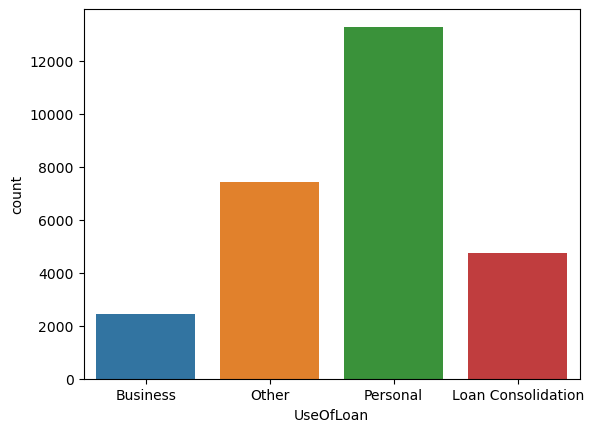

In [47]:
sns.countplot(modifed_data.UseOfLoan)

In [48]:
modifed_data.drop(modifed_data[modifed_data['UseOfLoan'] == -1].index, inplace=True)


In [49]:
modifed_data.columns

Index(['Age', 'Gender', 'Amount', 'Interest', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus', 'WorkExperience',
       'HomeOwnershipType', 'IncomeTotal', 'DebtToIncome', 'Status'],
      dtype='object')

<AxesSubplot:xlabel='UseOfLoan', ylabel='count'>

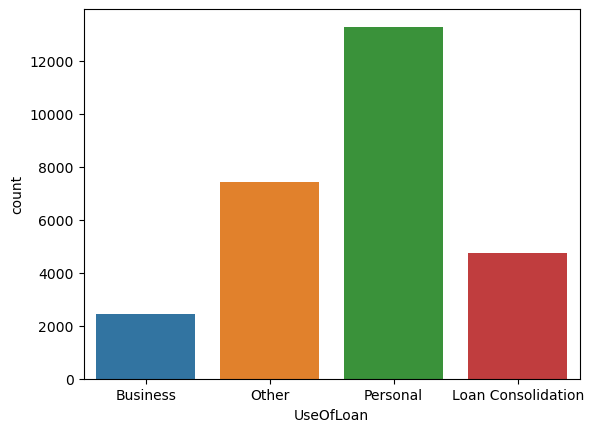

In [50]:
sns.countplot(modifed_data.UseOfLoan)

# EDA

In [51]:
numeric_features = modifed_data.select_dtypes(include=[np.number])
numeric_features.dtypes

Age                   int64
Gender              float64
Amount              float64
Interest            float64
MonthlyPayment      float64
MaritalStatus       float64
EmploymentStatus    float64
IncomeTotal         float64
DebtToIncome        float64
dtype: object

In [52]:
corr =numeric_features.corr()
corr

,Age,Gender,Amount,Interest,MonthlyPayment,MaritalStatus,EmploymentStatus,IncomeTotal,DebtToIncome
Age,1.000000,0.081383,0.065470,-0.116530,0.008656,-0.035185,0.309339,0.053014,-0.007420
Gender,0.081383,1.000000,-0.020988,-0.065763,-0.073411,-0.010853,-0.044968,-0.056087,0.060268
Amount,0.065470,-0.020988,1.000000,-0.146356,0.419839,-0.069020,0.028826,0.080149,0.234934
Interest,-0.116530,-0.065763,-0.146356,1.000000,0.308014,0.087238,-0.003384,0.042726,0.018879
MonthlyPayment,0.008656,-0.073411,0.419839,0.308014,1.000000,-0.003556,0.056802,0.119233,0.304513
MaritalStatus,-0.035185,-0.010853,-0.069020,0.087238,-0.003556,1.000000,0.045761,-0.034543,0.000758
EmploymentStatus,0.309339,-0.044968,0.028826,-0.003384,0.056802,0.045761,1.000000,0.025274,-0.039962
IncomeTotal,0.053014,-0.056087,0.080149,0.042726,0.119233,-0.034543,0.025274,1.000000,-0.068104
DebtToIncome,-0.007420,0.060268,0.234934,0.018879,0.304513,0.000758,-0.039962,-0.068104,1.000000


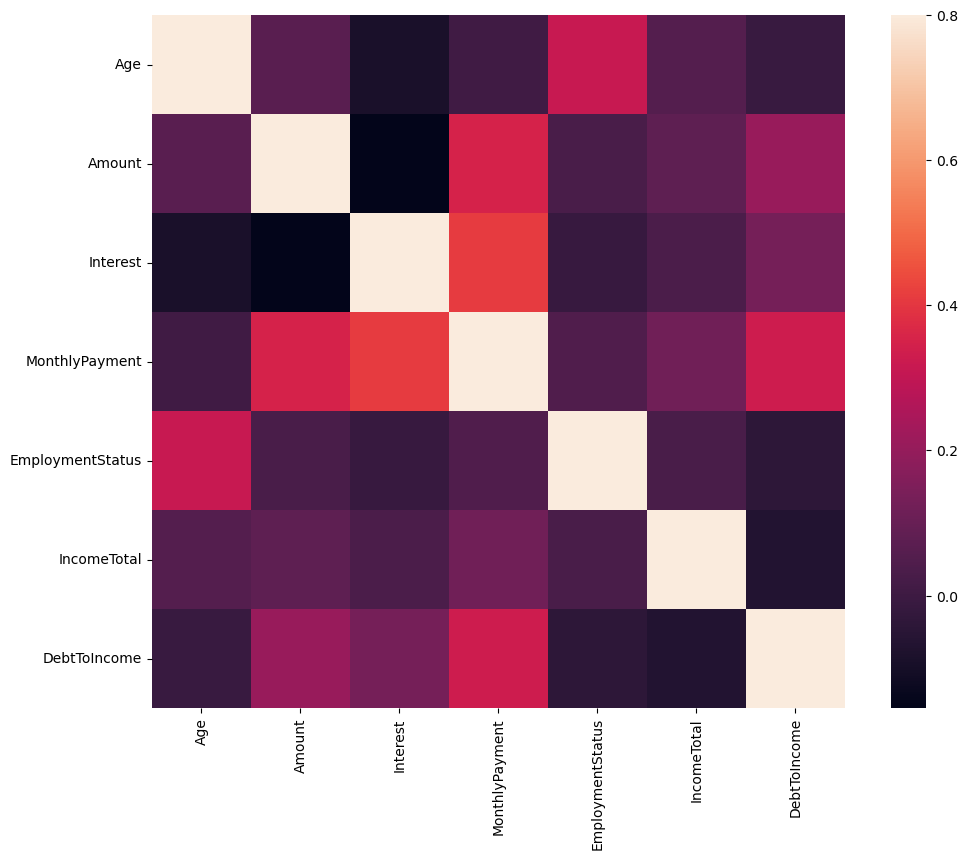

In [132]:
# correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

# Bivariant analysis between amount and education

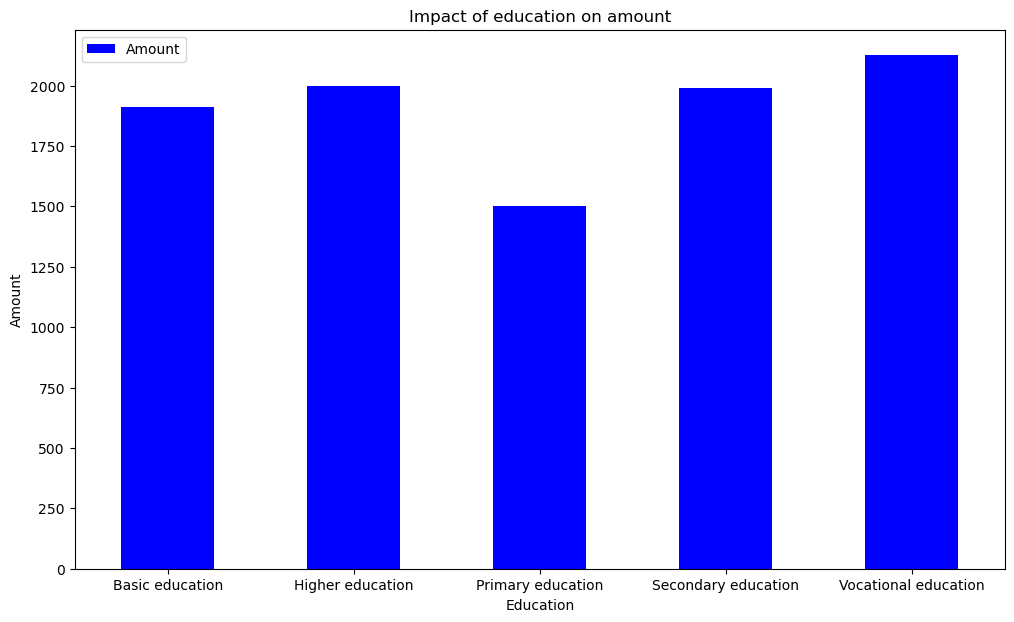

In [430]:
Education_pivot = modifed_data.pivot_table(index='Education', values="Amount", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Education")
plt.ylabel("Amount")
plt.title("Impact of education on amount")
plt.xticks(rotation=0)
plt.show()


# Income and monthly payment

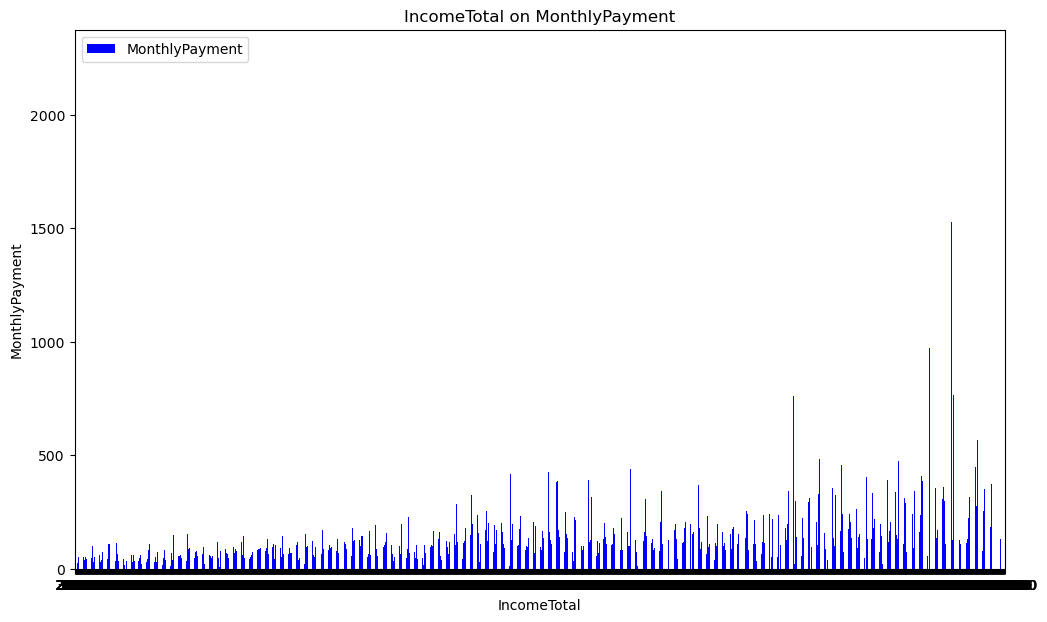

In [431]:
Education_pivot = modifed_data.pivot_table(index='IncomeTotal', values="MonthlyPayment", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("IncomeTotal")
plt.ylabel("MonthlyPayment")
plt.title("IncomeTotal on MonthlyPayment")
plt.xticks(rotation=0)
plt.show()


# Age on Amount

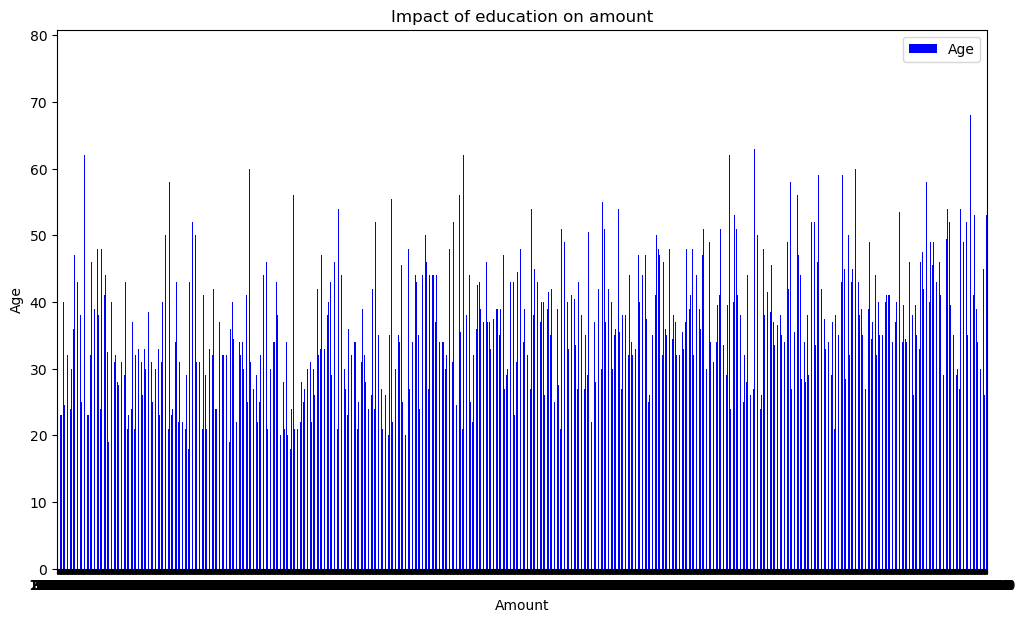

In [432]:
Education_pivot = modifed_data.pivot_table(index='Amount', values="Age", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Amount")
plt.ylabel("Age")
plt.title("Impact of education on amount")
plt.xticks(rotation=0)
plt.show()


In [ ]:
Education_pivot = modifed_data.pivot_table(index='UseOfLoan', values="Age", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("UseOfLoan")
plt.ylabel("UseOfLoan")
plt.title("Impact of age on UseOfLoan")
plt.xticks(rotation=0)
plt.show()


In [102]:
modifed_data.to_csv('modiefed_data.csv', index=False)

In [2]:
modifed_data['Status']

NameError: name 'modifed_data' is not defined